In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataurl='https://raw.githubusercontent.com/Abhinav0057/test/master/df.csv'
df=pd.read_csv(dataurl)

In [ ]:
df.head(7)

,Date,Index
0,2021-07-13,2871.04
1,2021-07-12,2854.77
2,2021-07-11,2899.82
3,2021-07-08,2824.90
4,2021-07-07,2801.13
5,2021-07-06,2818.11
6,2021-07-05,2822.74


In [ ]:
df.describe()

,Index
count,1680.000000
mean,1386.600952
std,450.627036
min,754.990000
25%,1131.782500
50%,1274.915000
75%,1549.702500
max,3025.830000


In [ ]:
df.dtypes

Date      object
Index    float64
dtype: object

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Index
0,2021-07-13,2871.04
1,2021-07-12,2854.77
2,2021-07-11,2899.82
3,2021-07-08,2824.90
4,2021-07-07,2801.13


In [ ]:

df.dtypes

Date     datetime64[ns]
Index           float64
dtype: object

In [ ]:
df.set_index('Date')

,Index
Date,
2021-07-13,2871.04
2021-07-12,2854.77
2021-07-11,2899.82
2021-07-08,2824.90
2021-07-07,2801.13
...,...
2014-02-06,785.78
2014-02-05,781.38
2014-02-04,774.91


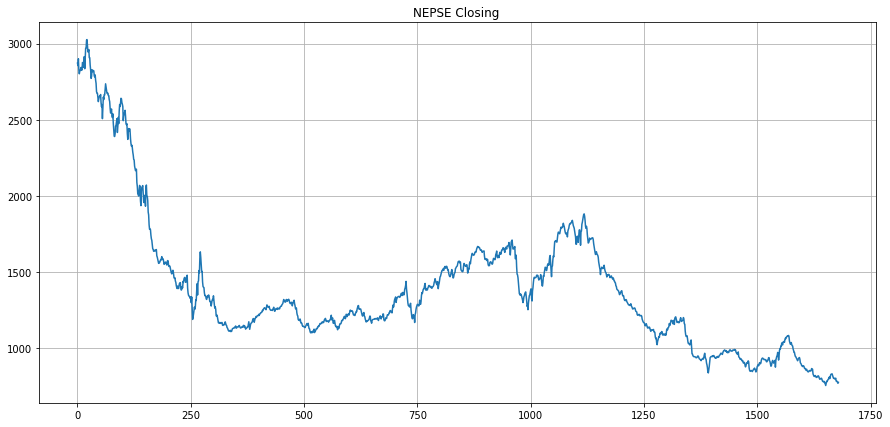

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(df['Index'])
plt.title('NEPSE Closing ')
plt.grid(True)
plt.show()

In [ ]:
df=df.iloc[::-1]
df.set_index('Date')
df

,Date,Index
1679,2014-02-02,775.92
1678,2014-02-03,769.51
1677,2014-02-04,774.91
1676,2014-02-05,781.38
1675,2014-02-06,785.78
...,...,...
4,2021-07-07,2801.13
3,2021-07-08,2824.90
2,2021-07-11,2899.82
1,2021-07-12,2854.77


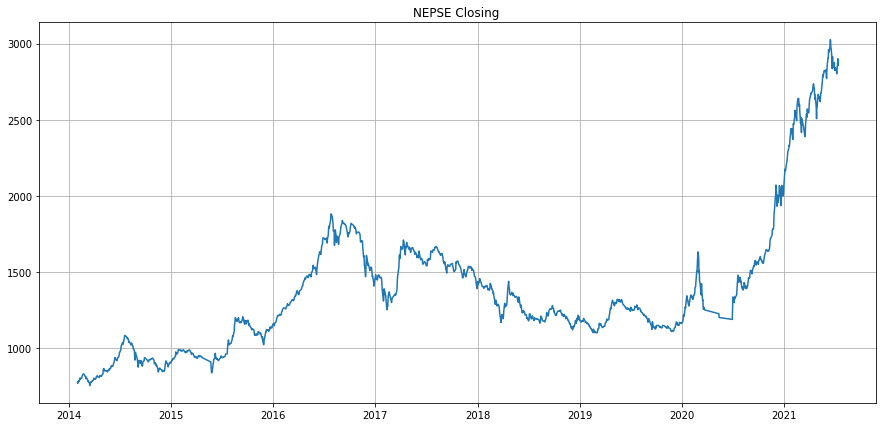

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(df['Date'],df['Index'])
plt.title('NEPSE Closing ')
plt.grid(True)
plt.show()

**Checking MA(Moving Aerage) on our NEPSE data**

In [ ]:
ma_days=[5,20,180]
for ma_day in ma_days:
  column_name=f'MA fot {ma_day} days'
  df[column_name]=df['Index'].rolling(ma_day).mean()


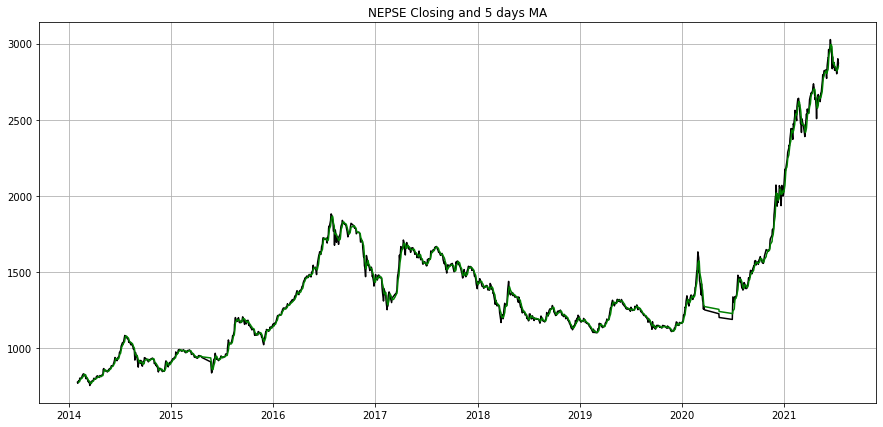

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(df['Date'],df['Index'],color='black')
plt.plot(df['Date'],df['MA fot 5 days'],color='green')
#plt.plot(df['Date'],df['MA fot 20 days'],color='blue')
#plt.plot(df['Date'],df['MA fot 180 days'],color='red')
plt.title('NEPSE Closing and 5 days MA')
plt.grid(True)
plt.show()

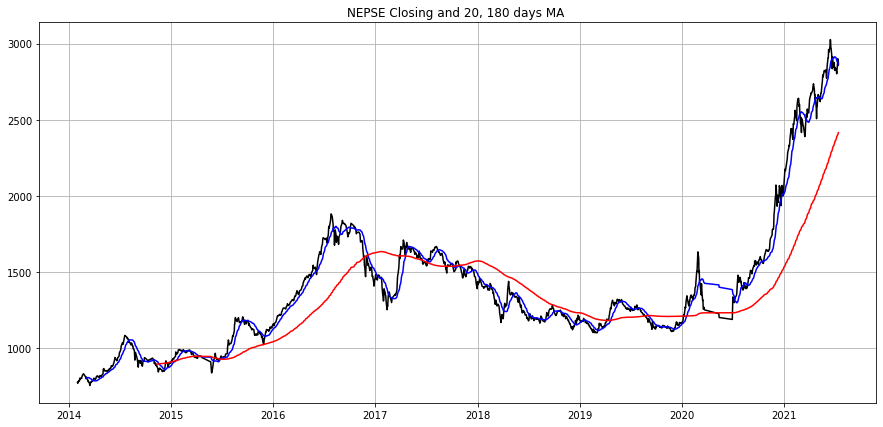

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(df['Date'],df['Index'],color='black')
#plt.plot(df['Date'],df['MA fot 5 days'],color='green')
plt.plot(df['Date'],df['MA fot 20 days'],color='blue')
plt.plot(df['Date'],df['MA fot 180 days'],color='red')
plt.title('NEPSE Closing and 20, 180 days MA ')
plt.grid(True)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


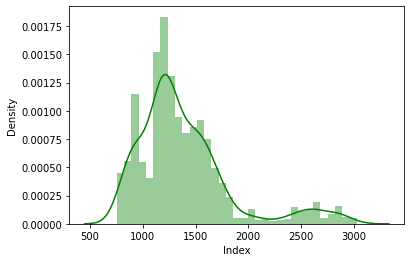

In [ ]:
sns.distplot(df['Index'].dropna(), color='green')

<Figure size 432x288 with 0 Axes>

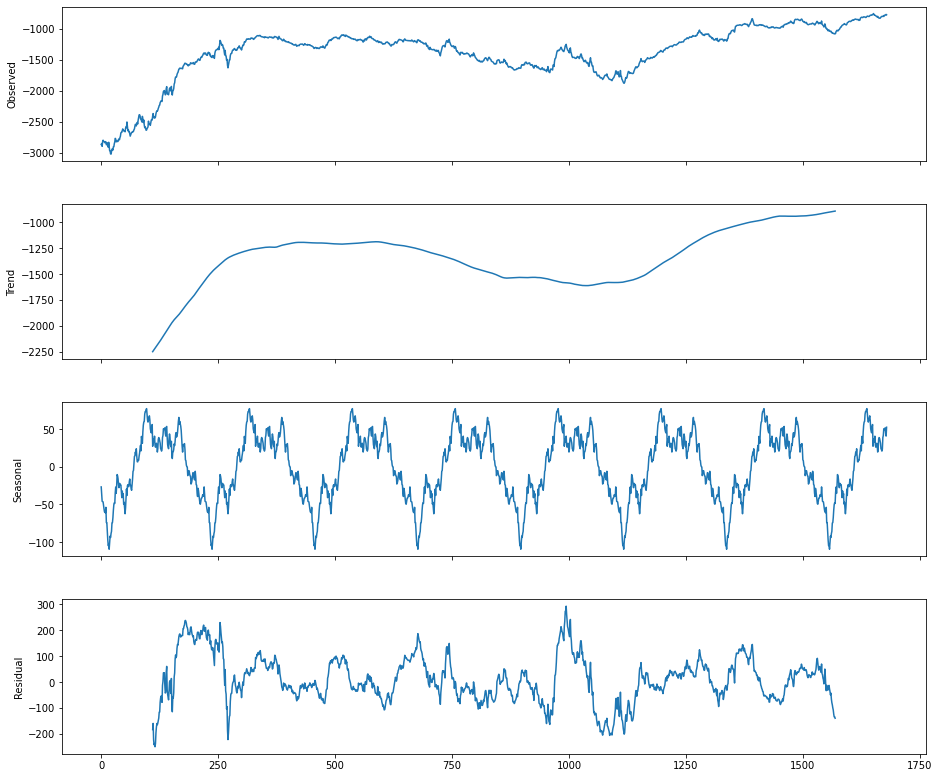

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(-df['Index'], model='additive', freq=220) ## assumption that share market opens for 5 days in a week so 240 days in a year and 20 days more public holidays

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

**using AR(Auto Regressie )Model**


In [ ]:
Index=df['Index'].values
Index


array([ 775.92,  769.51,  774.91, ..., 2899.82, 2854.77, 2871.04])

In [ ]:
train=Index[:1580]#

test=Index[1580:1680]#80
predictions=[]
test.size

train.size

1580

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error


In [ ]:
model_ar=AR(train)
model_ar_fit=model_ar.fit()

In [ ]:
predictions=model_ar_fit.predict(end=1700)
predictions

array([ 793.32205194,  787.09144227,  777.99723458, ..., 3053.10636808,
       3056.87125325, 3060.64161349])

In [ ]:
test

array([2601.51, 2611.45, 2636.68, 2640.35, 2607.67, 2586.51, 2599.56,
       2554.14, 2474.39, 2515.03, 2455.33, 2416.01, 2506.68, 2485.1 ,
       2461.88, 2458.49, 2407.26, 2389.19, 2391.75, 2432.15, 2475.09,
       2538.47, 2514.39, 2528.96, 2570.26, 2548.97, 2543.52, 2575.67,
       2619.03, 2631.9 , 2657.61, 2658.75, 2674.47, 2671.62, 2674.36,
       2691.56, 2714.79, 2735.46, 2699.51, 2661.94, 2664.62, 2632.21,
       2648.01, 2572.22, 2506.62, 2599.08, 2585.28, 2611.11, 2665.11,
       2652.76, 2654.69, 2649.6 , 2637.13, 2618.57, 2645.85, 2673.32,
       2673.88, 2684.01, 2738.3 , 2759.22, 2793.9 , 2780.81, 2787.19,
       2820.  , 2823.07, 2816.57, 2815.4 , 2827.93, 2782.69, 2771.15,
       2827.13, 2856.68, 2906.89, 2906.7 , 2960.14, 2946.58, 2944.78,
       2983.11, 3025.83, 3022.11, 2969.7 , 2968.43, 2905.15, 2834.41,
       2913.85, 2862.19, 2843.  , 2870.38, 2875.5 , 2828.01, 2823.88,
       2843.  , 2834.52, 2822.74, 2818.11, 2801.13, 2824.9 , 2899.82,
       2854.77, 2871

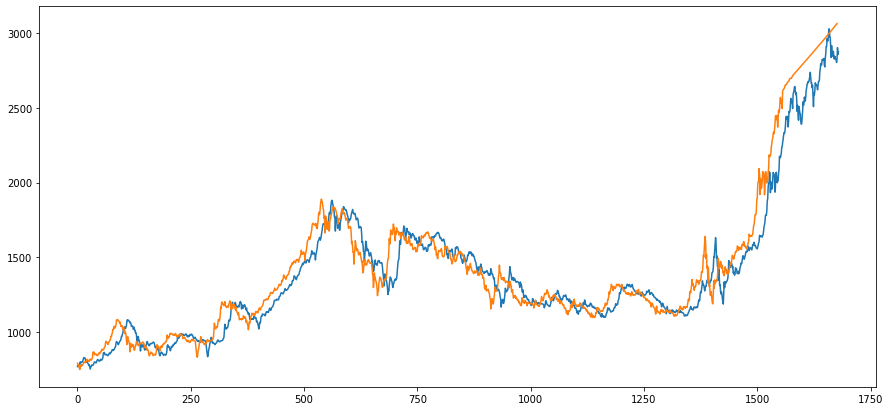

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(Index)
plt.plot(predictions)

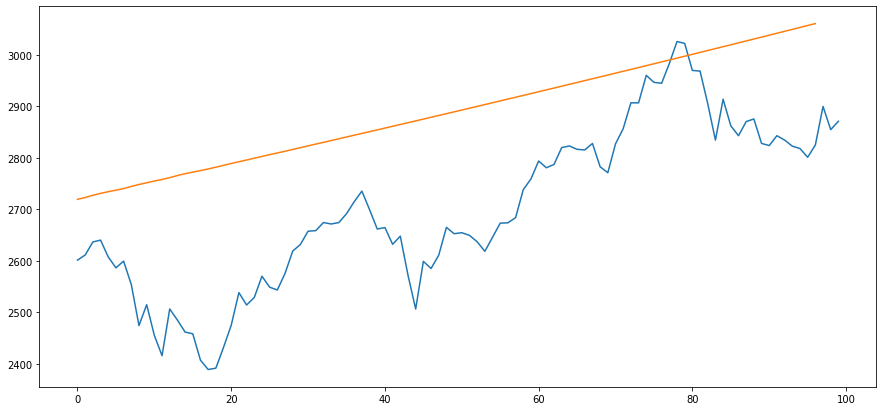

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(test)

plt.plot(predictions[1580:1679])


**ARIMA MODEL**

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1579
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6754.609
Method:                       css-mle   S.D. of innovations             17.441
Date:                Mon, 02 Aug 2021   AIC                          13517.217
Time:                        12:57:36   BIC                          13538.676
Sample:                             1   HQIC                         13525.191
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1550      0.505      2.287      0.022       0.165       2.145
ar.L1.D.y     -0.1306      0.145     -0.901      0.368      -0.415       0.153
ma.L1.D.y      0.3008      0.140      2.156      0.0